In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Fish.csv to Fish.csv


In [3]:
fish_data=pd.read_csv('Fish.csv')
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Scatterplot in Seaborn
This scatter plot shows the relationship between the length of a fish and its weight. Each dot represents a fish. As you move to the right on the plot (where the fish are longer), the dots also go higher (meaning they are heavier).

In simple words: longer fish tend to weigh more. There’s a clear trend – when the fish gets longer, it also gets heavier. This means there's a positive relationship between the fish's length and weight: more length, more weight.

Different colors represent different fish species. Most species follow the same pattern — longer fish of any type are usually heavier.

Text(0, 0.5, 'Fish Weight (g)')

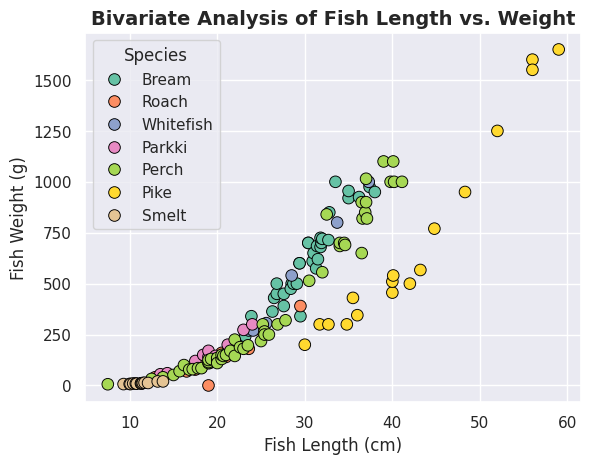

In [22]:
sns.set(style="darkgrid")
plot = sns.scatterplot(data=fish_data, x='Length1', y='Weight', hue='Species', palette='Set2', s=70, edgecolor='black')
plot.set_title('Bivariate Analysis of Fish Length vs. Weight', fontsize=14, fontweight='bold')
plot.set_xlabel('Fish Length (cm)', fontsize=12)
plot.set_ylabel('Fish Weight (g)', fontsize=12)

# Crosstab

In [24]:
pd.crosstab(index=fish_data['Species'], columns='count')

col_0,count
Species,
Bream,35
Parkki,11
Perch,56
Pike,17
Roach,20
Smelt,14
Whitefish,6


This cross-tabulation shows the number of fish for each species in the dataset. The table lists the species of fish on the left and the count (or frequency) of how many fish of each type are recorded on the right.

## Since crosstab is typically used to compare two categorical columns and I currently have only one, I'm creating a new categorical column to enable the comparison.

In [25]:
fish_data['weight_category'] = pd.cut(fish_data['Weight'], bins=[0,300,600,fish_data['Weight'].max()], labels=['low','medium','high'])

In [26]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,weight_category
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,low
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,low
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,medium
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,medium
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,medium


In [27]:
pd.crosstab(index=fish_data['Species'], columns=fish_data['weight_category'])

weight_category,low,medium,high
Species,,,
Bream,2,15,18
Parkki,11,0,0
Perch,36,3,17
Pike,4,7,6
Roach,18,1,0
Smelt,14,0,0
Whitefish,2,2,2


This table shows a comparison between fish species and their weight categories (low, medium, high). It helps us understand how the weight of fish is distributed across different species.

The rows represent different fish species.

The columns represent weight categories.
Each cell shows how many fish of that species fall into that weight category.
This table helps identify how different fish species vary in weight. Species like Bream and Perch have fish in higher weight categories, while Smelt, Roach, and Parkki are mostly found in the lower weight range.

# Pivot Tables

This table is showing average weight of ishes per specie

In [28]:
pd.pivot_table(fish_data, values='Weight', index='Species', aggfunc='mean')

,Weight
Species,
Bream,617.828571
Parkki,154.818182
Perch,382.239286
Pike,718.705882
Roach,152.050000
Smelt,11.178571
Whitefish,531.000000


### 2 categorical columns and 1 numerical

In [33]:
# Count of fish by species and weight category
fish_data.pivot_table(index='Species', columns='weight_category', values='Weight', aggfunc='count')

/tmp/ipython-input-2102694471.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fish_data.pivot_table(index='Species', columns='weight_category', values='Weight', aggfunc='count')


weight_category,low,medium,high
Species,,,
Bream,2,15,18
Parkki,11,0,0
Perch,36,3,17
Pike,4,7,6
Roach,18,1,0
Smelt,14,0,0
Whitefish,2,2,2


index='Species'
Rows will be grouped by Species (e.g., Bream, Perch, Roach, etc.).

columns='Weight_Category'
The columns of the table will be the Weight_Category values (like 'low', 'medium', 'high').

values='Weight'
The function is applied to the Weight column (not Weight_Category itself).

aggfunc='count'
The function used to aggregate the data is count, so it counts how many times a Weight value appears in each combination of Species and Weight_Category.



# PAIRPLOTS
This is a grid of scatterplots that shows how different measurements of fish (like weight, length, height, and width) relate to each other across various species.
## Positive Correlation
Most of the measurements (like weight and length) have a positive relationship — as one increases, the other tends to increase too.

You can clearly see upward trends in:

Weight vs Length1

Length1 vs Length2

Length3 vs Height

## Species Clustering
Different species tend to form clusters in the plots, meaning each species has typical size/weight ranges.

Smelt (pink) are the smallest in almost every measurement.

Perch (brown) appear across a wide range — large variation.

Pike (light blue) are among the largest and heaviest.



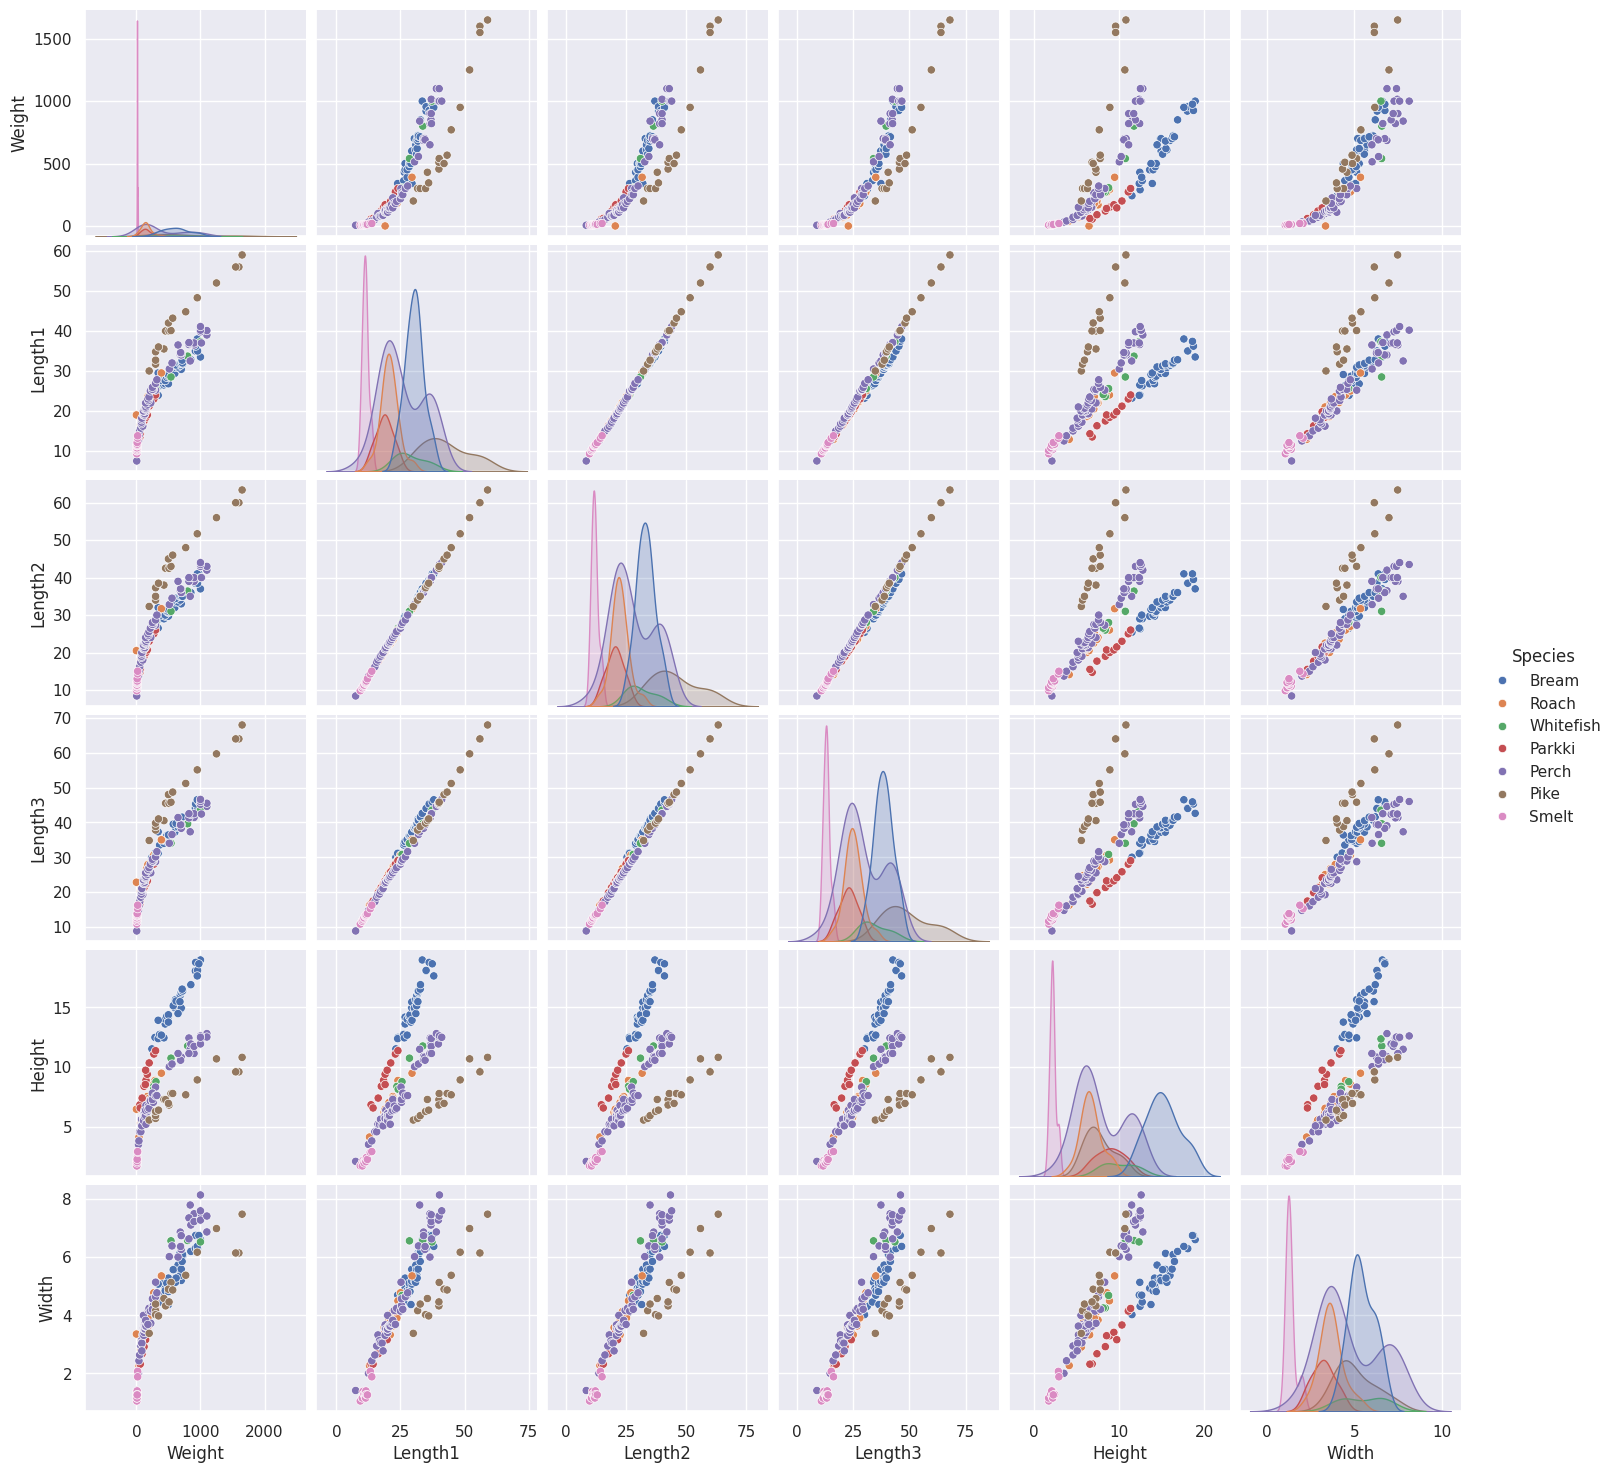

In [40]:
sns.pairplot(data=fish_data,hue='Species')

# Bar chart

This bar chart is showing average weight of each specie

/tmp/ipython-input-3074853181.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fish_data, x='Species', y='Weight', estimator='mean', ci=None)


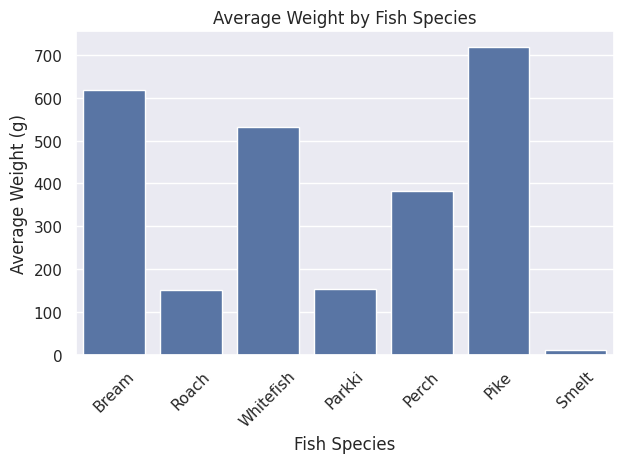

In [45]:
sns.barplot(data=fish_data, x='Species', y='Weight', estimator='mean', ci=None)

plt.title('Average Weight by Fish Species')
plt.xlabel('Fish Species')
plt.ylabel('Average Weight (g)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-886455771.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fish_data, x='Species', y='Weight', estimator='sum', ci=None)


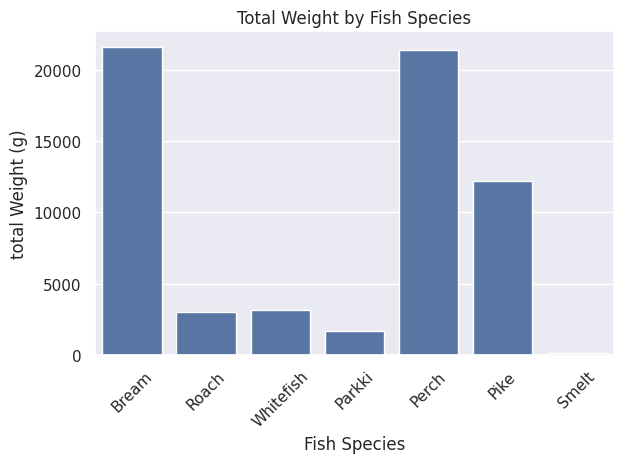

In [48]:
sns.barplot(data=fish_data, x='Species', y='Weight', estimator='sum', ci=None)

plt.title('Total Weight by Fish Species')
plt.xlabel('Fish Species')
plt.ylabel('total Weight (g)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#This barplot is shwoing total weight of species

# Boxplots
Box: Middle 50% of data (Interquartile Range: Q1 to Q3)

Line inside box: Median (middle value of weights for that species)

Whiskers: Data spread excluding outliers

Circles: Outliers (extreme values)

Text annotations: Median values written above each box

## 1. Bream
Median (central line in box): Around 610g

Box (IQR): Shows that 50% of Breams have weights between approximately 550g to 700g

Whiskers: Max fishes weigh upto 1000g and min to 250g

 Bream has a relatively high and consistent weight. Most of them fall within the 500–800g range.

## 2. Parkki
Median: About 147.5g

Box: Ranges roughly from 150g to 230g

Whiskers: From 120g to 250g

Interpretation: Parkki is a lighter species. Most fishes are close in weight (less variation).

## 3. Perch
Median: Around 510g

Box: Between 200g and 650g

Whiskers: Extend from about 0g to 1100g

Interpretation: Perch shows more variation in weight than Parkki, and some are much heavier.

## 4. Pike
Median: Around 423g

Box: From 400g to 900g

Whiskers: Spread wide, 200 up to 1700g or more

Interpretation: Pike is the heaviest species overall, with a broad weight range.

## 5. Roach
Median: Around 150g

Box: From 120g to 180g

Whiskers: Between 100g and 200g

Interpretation: Roach is one of the lightest and most consistent species in weight.

## 6. Smelt
Median: Around 9.9g

Box: Between 80g and 120g

Whiskers: Narrow, maybe 60g to 140g

Interpretation: Smelt is the smallest species here, with least variation in weight.

## 7. Whitefish
Median: Around 207.5g

Box: From 300g to 700g

Whiskers: Extend broadly, maybe 350g to 700g


 Interpretation: Whitefish is a moderate-weight species with a fairly consistent range.

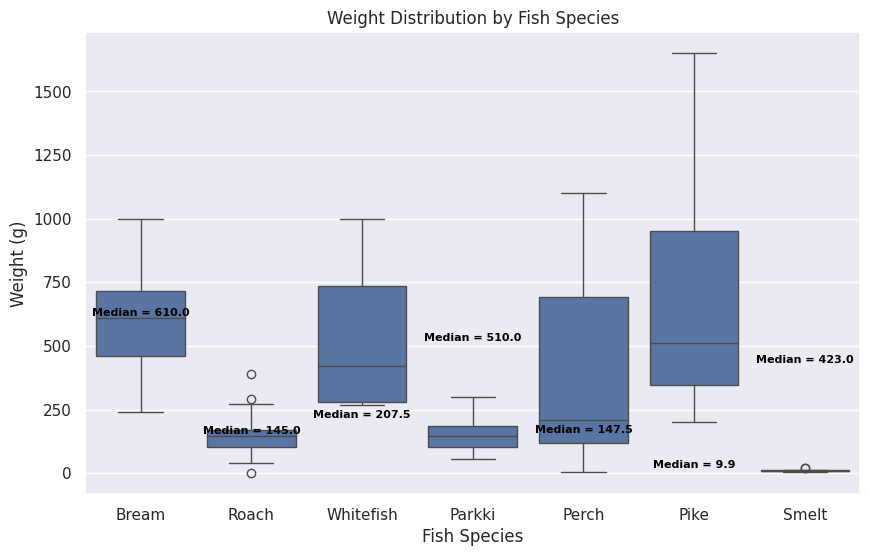

In [56]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=fish_data, x='Species', y='Weight')
medians = fish_data.groupby('Species')['Weight'].median().values
for i, median in enumerate(medians):
    ax.text(i, median + 10, f'Median = {median:.1f}',
            horizontalalignment='center', color='black', weight='bold',fontsize=8)
plt.title('Weight Distribution by Fish Species')
plt.xlabel('Fish Species')
plt.ylabel('Weight (g)')

plt.show()

# Histogram
“This overlapping histogram compares the weight distributions of Bream and Roach fish. The blue bars represent Bream, and the red bars represent Roach.

From the plot, we observe:

Bream generally have higher weights, clustering between 500g and 800g.

Roach are lighter, with most weights between 100g and 250g.

There’s minimal overlap between their distributions, indicating that these two species have distinct weight ranges, making them easy to differentiate based on weight alone.”

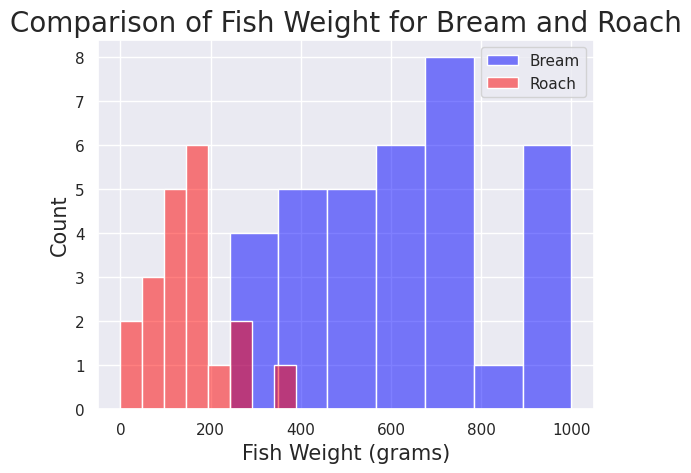

In [67]:
fish_bream = fish_data.loc[fish_data['Species'] == 'Bream']
fish_roach = fish_data.loc[fish_data['Species'] == 'Roach']

# Create overlapping histograms for Weight
ax = sns.histplot(data=fish_bream, x='Weight', color='blue', alpha=0.5, label='Bream')
ax = sns.histplot(data=fish_roach, x='Weight', color='red', alpha=0.5, label='Roach')

# Customize the chart
ax.set_xlabel('Fish Weight (grams)', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Comparison of Fish Weight for Bream and Roach', fontsize=20)

# Show legend
plt.legend()
plt.show()


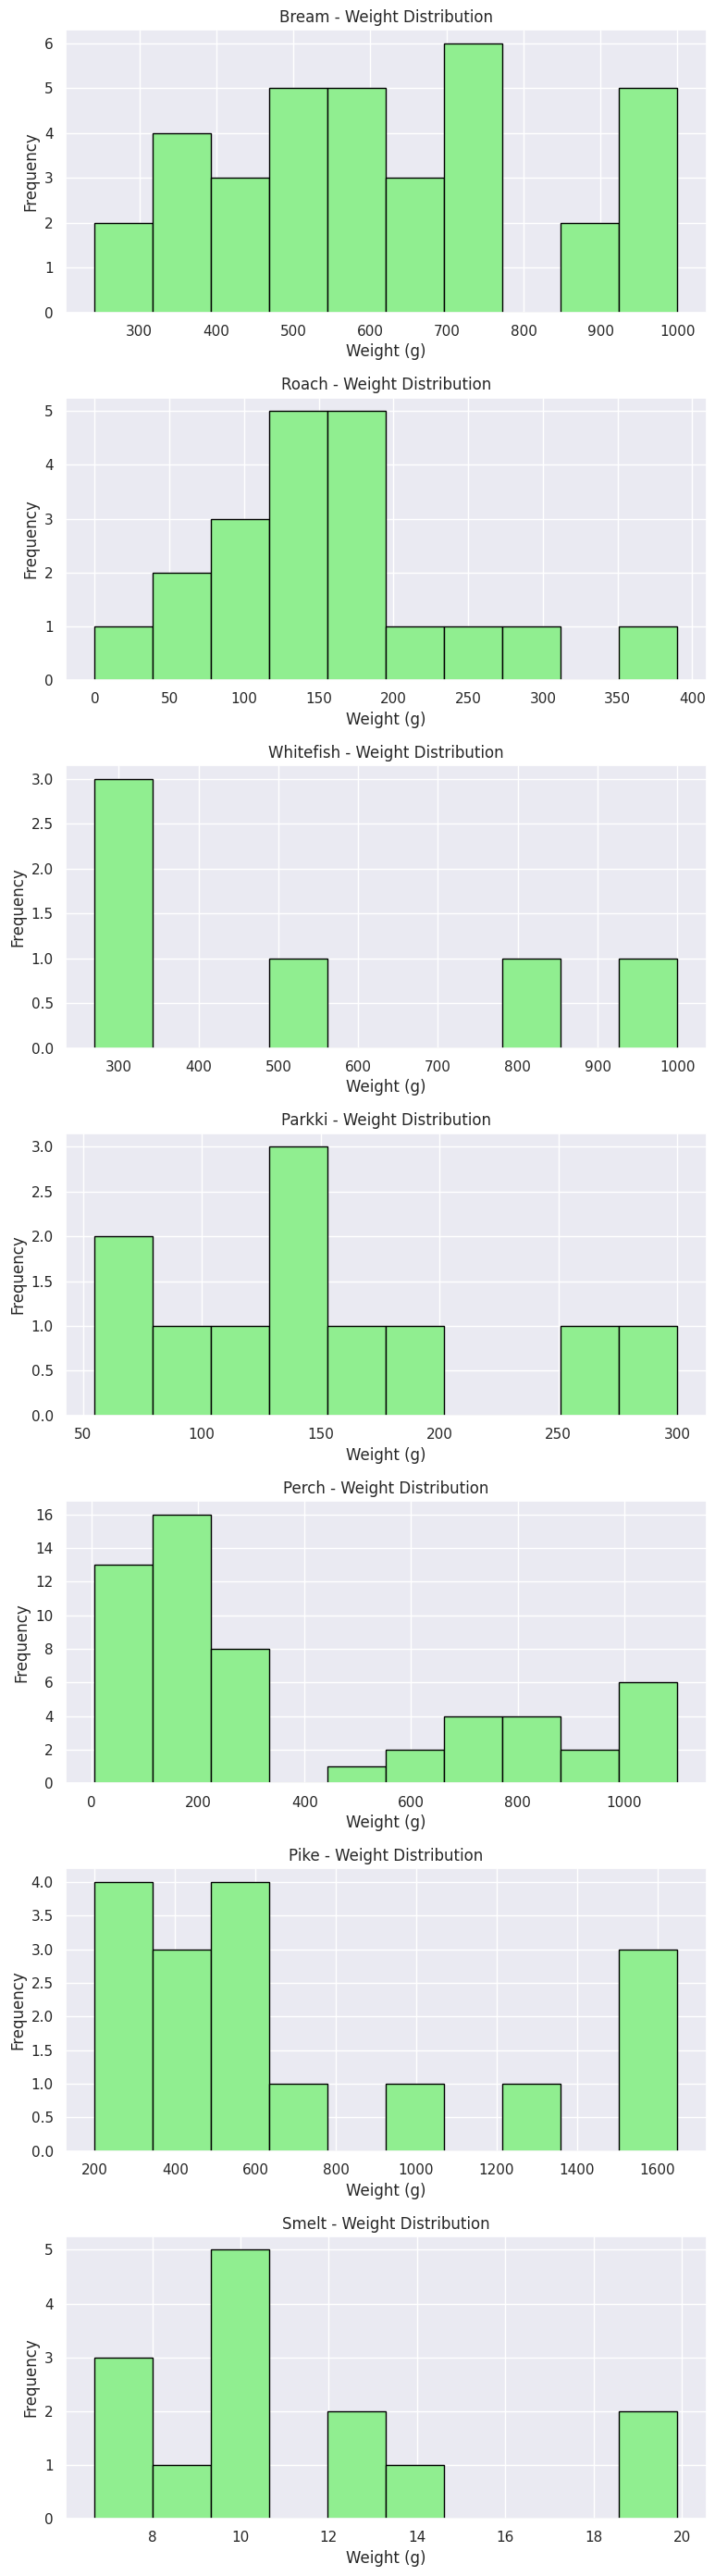

In [64]:

species_list = fish_data['Species'].unique()

# Setup subplots
fig, axes = plt.subplots(nrows=len(species_list), figsize=(8, 4 * len(species_list)))

# Plot each histogram
for i, species in enumerate(species_list):
    subset = fish_data[fish_data['Species'] == species]['Weight']
    axes[i].hist(subset, bins=10, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'{species} - Weight Distribution')
    axes[i].set_xlabel('Weight (g)')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



# 1. Bream - Weight Distribution
Most weights are between 500g and 800g.

The distribution looks somewhat normal (bell-shaped).

High frequency around the 700g mark.

Suggests Breams are generally heavier compared to many other species.

# 2. Roach
Mostly lightweight fish.

Common weight range: 100g to 250g.

Distribution is right-skewed (more fish on lower weight).

Few fish go up to 350g–400g, but these are rare.

# 3. Whitefish
Very sparse data — few observations.

Weights range from under 300g up to 1000g, but spread out.

No clear peak — can't confidently describe the distribution shape.

# 4. Parkki
Most fish are between 50g and 200g.

A small peak around 125g.

All fish are lightweight.

Slight right skew, meaning a few slightly heavier fish, but not many.

# 5. Perch
Widest spread of all species — from very light (under 50g) to over 1100g.

Two visible clusters:

One around 100–200g (smaller Perch).

Another around 700–1100g (bigger Perch).

This may indicate young and adult Perch included in the data.

# 6. Pike
Heavyweight species.

Weights mostly between 300g to 1600g.

Peak around 400g to 700g.

Some very large fish (over 1400g).

Distribution is slightly bimodal.

# 7. Smelt
Very lightweight fish.

Mostly under 15g.

Peak around 10g.

This species is significantly smaller than all others.

# Correlation Heatmap in Seaborn
## Explanation of Correlation Heatmap Output:
This correlation heatmap shows how strongly related different numerical columns in our dataset are to each other.

The values in the heatmap range from -1 to +1.

+1 means a perfect positive correlation: when one variable increases, the other increases too.

-1 means a perfect negative correlation: when one variable increases, the other decreases.

From this plot i can say that weight and length has direct relation more the length higher the wait.
All these lengths have some kind of relation with weight and each other thats why its value is closer to 1.



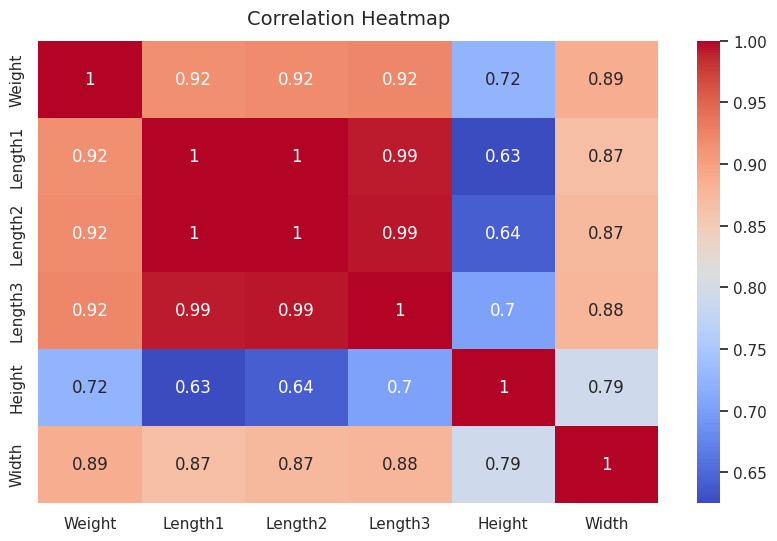

In [74]:
# Select only numeric columns
numeric_data = fish_data.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()
